## Example 1: Working with US Presidents' height data file, and deriving statistical information about the data using Numpy array##
Copy/paste all code from the Input text boxes (labeled In on the left side) of this notebook, into your Jupyter notebook and run it. After that try out different commands to test. Matplolib has many interesting functions that can draw very interesting graphs. Note that once you have run a set of commands in a cell, they will remain in memory. So, when you go to the next cell below, you dont need to repeat the commands that have already been executed before that cell.<br>

Since the data is in order from first president to last (Obama) you can plot the order (1,2,3..) on x-axis and hieght on y-axis, and see if there is trend toward president's heights increasing with time.

   order               name  height(cm)
0      1  George Washington         189
1      2         John Adams         170
2      3   Thomas Jefferson         189
3      4      James Madison         163
4      5       James Monroe         183
---------------
[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]
---------------
Mean height:        179.73809523809524
Standard deviation: 6.931843442745892
Minimum height:     163
Maximum height:     193
25th percentile:    174.25
Median:             182.0
75th percentile:    183.0
---------------


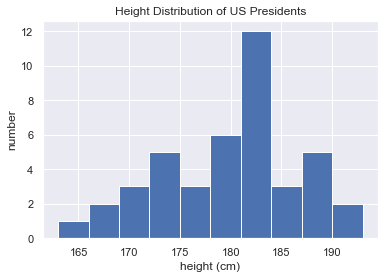

In [4]:
import numpy as np
import pandas as pd
import requests
from io import StringIO

# GET THE DATA from the internet URL
url= "https://share.cocalc.com/share/e9d2f604-5c15-48c1-8c69-4d560cf9a933/PythonDataScienceHandbook/notebooks/data/president_heights.csv"
s = requests.get(url).text
data=pd.read_csv(StringIO(s)) # data is a Panda Dataframe
print(data.head())
print("---------------")

heights = np.array(data['height(cm)']) #heights is a numpy array
print(heights)
print("---------------")

# PRINT SOME STATS
print("Mean height:       ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height:    ", heights.min())
print("Maximum height:    ", heights.max())
print("25th percentile:   ", np.percentile(heights, 25))
print("Median:            ", np.median(heights))
print("75th percentile:   ", np.percentile(heights, 75))
print("---------------")

#Lets VISUALIZE THE HEIGHT DISTRIBUTION
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number');

## Example 2: Working with Seattle rainfall data from 2014##
People generally complain that the Northwest US is rainy. Does the data tell you if its true? Play around and find out other interesting things about this very simple data set.<br>

Can you plot the daily rainfall as a line plot, with day of the year as x-axis, and the rainfall as y-axis?

---------------
---------------
29
---------------
Number days without rain:       215
Number days with rain:          150
Days with more than 0.5 inches: 37
Rainy days with < 0.2 inches  : 75
---------------
Median precip on rainy days in 2014 (inches):    0.19488188976377951
Median precip on summer days in 2014 (inches):   0.0
Maximum precip on summer days in 2014 (inches):  0.8503937007874016
Median precip on non-summer rainy days (inches): 0.20078740157480315
---------------


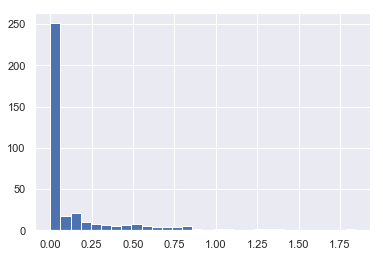

In [5]:
import numpy as np
import pandas as pd
import requests
from io import StringIO

# GET THE DATA
url= "https://share.cocalc.com/share/8b892baf91f98d0cf6172b872c8ad6694d0f7204/PythonDataScienceHandbook/notebooks/data/Seattle2014.csv"
s = requests.get(url).text
data=pd.read_csv(StringIO(s)) # data is a Panda Dataframe
#print(data.head())
print("---------------")

rainfall  = np.array(data['PRCP']) #rainfall is a numpy array, in mm
#print(rainfall)
print("---------------")

#lets visualize a little
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot styles

rainfall_inches = rainfall/254.0 #rainfall in inches (converted from mm)
#print(rainfall_inches)
plt.hist(rainfall_inches, bins=30)

#The data is clearly skewed toward days with 0 rain.
#lets understand the data set better

#how many days with rainfall b/w 0.5 and 1 inches
print(np.sum((rainfall_inches > 0.5) & (rainfall_inches < 1))) #note bitwise operator &
print("---------------")
print("Number days without rain:      ", np.sum(rainfall_inches == 0))
print("Number days with rain:         ", np.sum(rainfall_inches != 0))
print("Days with more than 0.5 inches:", np.sum(rainfall_inches > 0.5))
print("Rainy days with < 0.2 inches  :", np.sum((rainfall_inches > 0) &
                                                (rainfall_inches < 0.2)))
print("---------------")

#Now lets construct some masks and gather relevant statistics

# construct a mask of all rainy days
rainy = (rainfall_inches > 0)
# construct a mask of all summer days (June 21st is the 172nd day)
days = np.arange(365)
summer = (days > 172) & (days < 262)

print("Median precip on rainy days in 2014 (inches):   ",
      np.median(rainfall_inches[rainy]))
print("Median precip on summer days in 2014 (inches):  ",
      np.median(rainfall_inches[summer]))
print("Maximum precip on summer days in 2014 (inches): ",
      np.max(rainfall_inches[summer]))
print("Median precip on non-summer rainy days (inches):",
      np.median(rainfall_inches[rainy & ~summer]))
print("---------------")

## Example 3: Working with World Temperature Data##
There are two data files already included in the git. You will need to add them to the same directory where your notebook is stored.<br>
About the data files - One data set that you loaded (5-year-mean-1951-1980.csv) uses a 30-year mean between 1951 and 1980 to calculate a base temperature for that period, and then uses 5-year mean temperatures to calculate the difference between the 5-year mean and the 30-year mean for each year.<br>
The second dataset has similar data for 1882 to 2014 time period.

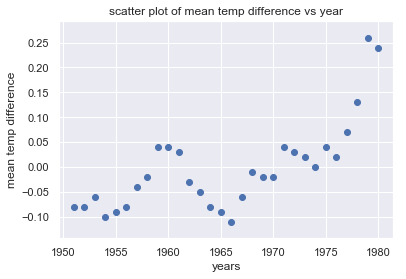

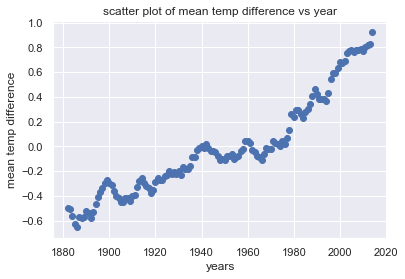

In [11]:
#usual imports
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns; sns.set()

#import the data files
yearsBase, meanBase = np.loadtxt('5-year-mean-1951-1980.csv', delimiter=',', usecols=(0, 1), unpack=True)
years, mean = np.loadtxt('5-year-mean-1882-2014.csv', delimiter=',', usecols=(0, 1), unpack=True)

#inspect the data by uncommenting these 4 print statements below
#print(yearsBase) 
#print(meanBase)
#print(years)
#print(mean)

#create a scatter plot shows the annual temperature differences.
#first plot for 1951 to 1980
plt.scatter(yearsBase, meanBase)
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
plt.show()

#second plot for 1882 to 2014
plt.scatter(years, mean)
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
plt.show()

Observe from the plots that there is an upward trend in the annual temperature. But what is the shape of this curve?
This is where you use statitics.

Its always good to start with the simplest assumption - in this case, we assume the temperature is rising along a straight line, of the type `y = mx + b`

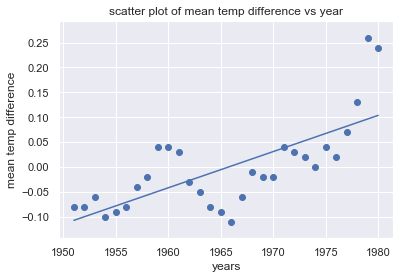

 y = 0.007279199110122247 * x + -14.309265850945273


In [17]:
# we are going to use a numpy function called polyfit and tell it to create a straight line internally with the data
#the last argument to polyfit is 1, which means a straight line. If you give 2, it will try to draw a quadratic internally
m,b = np.polyfit(yearsBase, meanBase, 1)
#after the above line is executed, we have the m and b for the equation y = mx + b, where x is years, and y is mean temp difference

# This is a simple y = mx + b line function
def f(x):
    return m*x + b

# This generates the same scatter plot as before, but adds a line plot using the function above
plt.scatter(yearsBase, meanBase)
plt.plot(yearsBase, f(yearsBase))
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
plt.show()

# Prints text to the screen showing the computed values of m and b
print(' y = {0} * x + {1}'.format(m, b))
plt.show()

So far we have drawn a straight line through the data from 1951 to 1980, and obtained the m and b for the straight line. Next, we use these m and b values (that define the straight line) and use that against the data from 1882 to 2014.

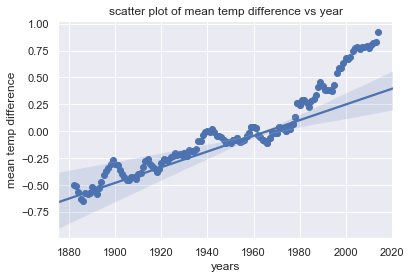

In [15]:
plt.scatter(years, mean)
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
sns.regplot(yearsBase, meanBase)
plt.show()

So, what do we see now? Well, it seems the temp on Earth had been rising, almost a straigth line, from 1882 to 1980. But then something happened around 1980, and the temp starting rising much faster after that. This type of analysis adds to the evidence that climate change is accelerating. <br>
So, in this example, you have done a simple exercise of how scientists analyze data. They collect accurate data as much as possible and then they analyze. Usually, they start with a simple assumption (like a straight line in this case) and see if the data can be understood within the set of simple assumptions. In this case, the simple straight line assumption holds, to prove that after 1980, the temp rise started accelerating. In this example, you were also able to draw a straight line using a program, which is pretty cool.

One last thing - At this point, you should save your notebook. Go to File -> Save & Checkpoint <br>

Now if you want, you can convert your notebook to a slide show. Go to View -> Cell Toolbar -> Slideshow. Each cell will then have an option on top right corner to convert it to different type of slide. <br>
Also, you can export the whole notebook to HTML or PDF as well. Go to File -> Download as